# Thuật toán Nesterov accelerated gradient cho hồi quy tuyến tính


Họ và tên: Ngụy Vũ Nam
<br>Lớp: Khoa học dữ liệu ứng dụng

Với X là ma trận thuộc tính
<br>y là biến phụ thuộc
<br>w là vector trọng số với số chiều phù hợp
<br>Ta có các hàm cần thiết:
<br>Hàm f(X)=X*w 
<br>Hàm cost function cho hồi quy tuyến tính: J(w)=1/(2*m)*(y − X*w)^2
<br>Đạo hàm hàm cost: Grad J(w)=(1/m)* X'*(X*w-y)
<br>Xử lý trên tập data là dữ liệu giá nhà ở Boston của thư viện sklearn

### Nhập các thư viện cần thiết

In [14]:
import numpy as np #Nhập thư viện numpy gọi với tên np
from sklearn.datasets import load_boston #nhập tập dữ liệu giá nhà của thư viện sklearn
from sklearn.model_selection import train_test_split #chia tập dữ liệu
import matplotlib.pyplot as plt #thư viện matplotlib

### Các hàm cần dùng

In [15]:
   #Hàm gradient descent Nesterov
def GD_Nes(X, y, eta, gamma,it3r):  
    theta = np.random.rand(len(X[0]),1) #khởi tạo giá trị theta ngẫu nhiên khoản [0,1]
    v = np.zeros_like(theta) #khởi tạo giá trị v đầu là vector 0
    for i in range(it3r): #vòng lặp cập nhật theta theo phương pháp Nesterov
        theta1 = theta - gamma*v
        v = gamma*v + eta*grad(X,y,theta1)        
        theta = theta - v 
    return theta 
   #Tính đạo hàm hàm cost function   
def grad(X,y,theta): #tính grad theo công thức Grad J(w)=(1/m) X'(Xw-y)
    m=len(X) #m là số mẫu tập X
    Xtheta=np.dot(X,theta) #nhân ma trận X và theta
    Xtrans=X.transpose()     #chuyển  vị ma trận X
    grad =np.dot(Xtrans,Xtheta-y) #nhân ma trận
    return grad/m 
   #Normalize data để các feature cùng nằm trên khoảng [0,1]
def normalize(data): #tìm giá trị lớn nhất và nhỏ nhất của từng thuộc tính, ánh xạ x thành (x- min)/(max-min)
    min_val = np.min(data, axis=0)
    max_val = np.max(data, axis=0)
    norm_x = np.array([(row - min_val) / (max_val - min_val) for row in data])
    return (norm_x,min_val,max_val)

### Sử lí dữ liệu

In [16]:
X, y = load_boston(return_X_y=True) #nhập data
y=y.reshape(len(y),1) #reshape lại y thành [503,1]. y ban đầu là kiểu [503,] tính toán sẽ bị lỗi
(X,Xmin,Xmax)= normalize(X) #chuẩn hóa X,y
(y,ymin,ymax)= normalize(y) #lưu cả giá trị min max để có thể reverse lại nếu cần
one = np.ones((X.shape[0], 1)) #tạo vector cột toàn 1 cho theta_0
Xbar = np.concatenate((one, X), axis = 1) #ghép vào tập X
X_train, X_test, y_train, y_test = train_test_split(Xbar, y, test_size=0.3, random_state=42) #trộn và chia tập dữ liệu
theta = GD_Nes(X_train, y_train, 0.2, 0.9,100) # train mô hình với 100 vòng lặp (tìm tham số theta)

# tính giá trị hàm loss của tệp test và tệp train với số vòng lặp khác nhau
# có thể dùng vòng lặp for của hàm GD_Nes để làm việc này
# giúp tiết kiệm tài nguyên máy
# nhưng đầu ra hàm GD_Nes sẽ phức tạp hơn
loss_train=[]
loss_test=[]
for i in range(1,100):
    theta = GD_Nes(X_train, y_train, 0.1, 0.9,i)
    m=len(X_train)
    a=y_train-np.dot(X_train,theta)
    b=a.transpose()
    c=np.dot(b,a)/(2*m)
    loss_train.append(c[0][0]) 
    m=len(X_test)
    d=y_test-np.dot(X_test,theta)
    e=d.transpose()
    f=np.dot(e,d)/(2*m)
    loss_test.append(f[0][0])    

### Vẽ biểu đồ loss

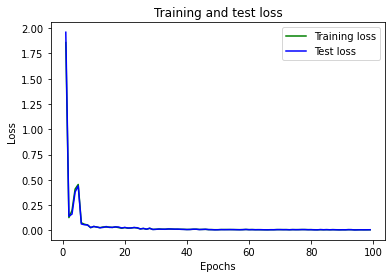

In [17]:
#vẽ biểu đồ
epochs = range(1,100) #tạo list só vòng lặp giá trị từ 1 tới 99
plt.plot(epochs, loss_train, 'g', label='Training loss') #vẽ biểu đồ loss train theo số lần lặp
plt.plot(epochs, loss_test, 'b', label='Test loss') #vẽ biểu đồ loss test theo số lần lặp
plt.title('Training and test loss') #tiêu đề biểu đồ
plt.xlabel('Epochs') #dán nhãn trục X
plt.ylabel('Loss')  #dán nhãn trục y
plt.legend() #chú thích
plt.show() # hiển thị figures

Ta thấy mô hình chạy tốt. Giá trị hàm loss hội tụ nhanh về cực tiểu. Có sự đồng nhất cao giá trị hàm loss giữa tập train và tập test.